In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [21]:
import os
lst = os.listdir('./extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_data/' + file))

In [22]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data['section_rel'] = all_data['section_count_after'] / all_data['section_count_before']
all_data

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,condition,section_rel
0,26,6,14.796762,155.331903,55.587047,30.757651,3.855342,441.9900,58.3479,73.665000,0,0.230769
1,29,9,34.777831,148.084435,43.911503,27.658633,9.986951,351.1691,19.9994,39.018789,0,0.310345
2,34,15,85.601295,214.310522,34.371442,12.206556,45.364941,727.2778,28.3025,48.485187,0,0.441176
3,36,11,28.909184,204.002451,37.853084,13.601471,36.404742,670.1199,24.9913,60.919991,0,0.305556
4,38,3,13.328464,471.872864,170.737374,34.014703,1.479150,458.3306,154.9523,152.776867,0,0.078947
...,...,...,...,...,...,...,...,...,...,...,...,...
8076,29,5,13.807284,315.369624,127.878778,63.906181,32.358965,360.9790,23.0151,72.195800,0,0.172414
8077,17,4,78.690068,143.610585,47.188224,18.099020,15.561553,589.5745,109.3013,147.393625,0,0.235294
8078,12,5,32.171217,89.000000,27.677492,12.165525,4.974326,679.1769,20.0055,135.835380,0,0.416667
8079,44,12,166.125001,281.824413,65.530663,29.408131,157.301882,645.8964,21.4975,53.824700,0,0.272727


In [23]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

3963

In [24]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -2] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -2] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [25]:
len(all_data[all_data.condition == 0])

3963

In [26]:
len(all_data[all_data.condition == 1])

3963

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7926 entries, 6319 to 4276
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   7926 non-null   int64  
 1   section_count_after    7926 non-null   int64  
 2   angle_max              7926 non-null   float64
 3   section_max_value      7926 non-null   float64
 4   section_average_value  7926 non-null   float64
 5   section_median_value   7926 non-null   float64
 6   square                 7926 non-null   float64
 7   time                   7926 non-null   float64
 8   time_median            7926 non-null   float64
 9   time_average           7926 non-null   float64
 10  condition              7926 non-null   int64  
 11  section_rel            7926 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 805.0 KB


In [28]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   0 non-null      int64  
 1   section_count_after    0 non-null      int64  
 2   angle_max              0 non-null      float64
 3   section_max_value      0 non-null      float64
 4   section_average_value  0 non-null      float64
 5   section_median_value   0 non-null      float64
 6   square                 0 non-null      float64
 7   time                   0 non-null      float64
 8   time_median            0 non-null      float64
 9   time_average           0 non-null      float64
 10  condition              0 non-null      int64  
 11  section_rel            0 non-null      float64
dtypes: float64(9), int64(3)
memory usage: 0.0 bytes


In [29]:
all_data.drop_duplicates(keep='first', inplace = True)

In [30]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

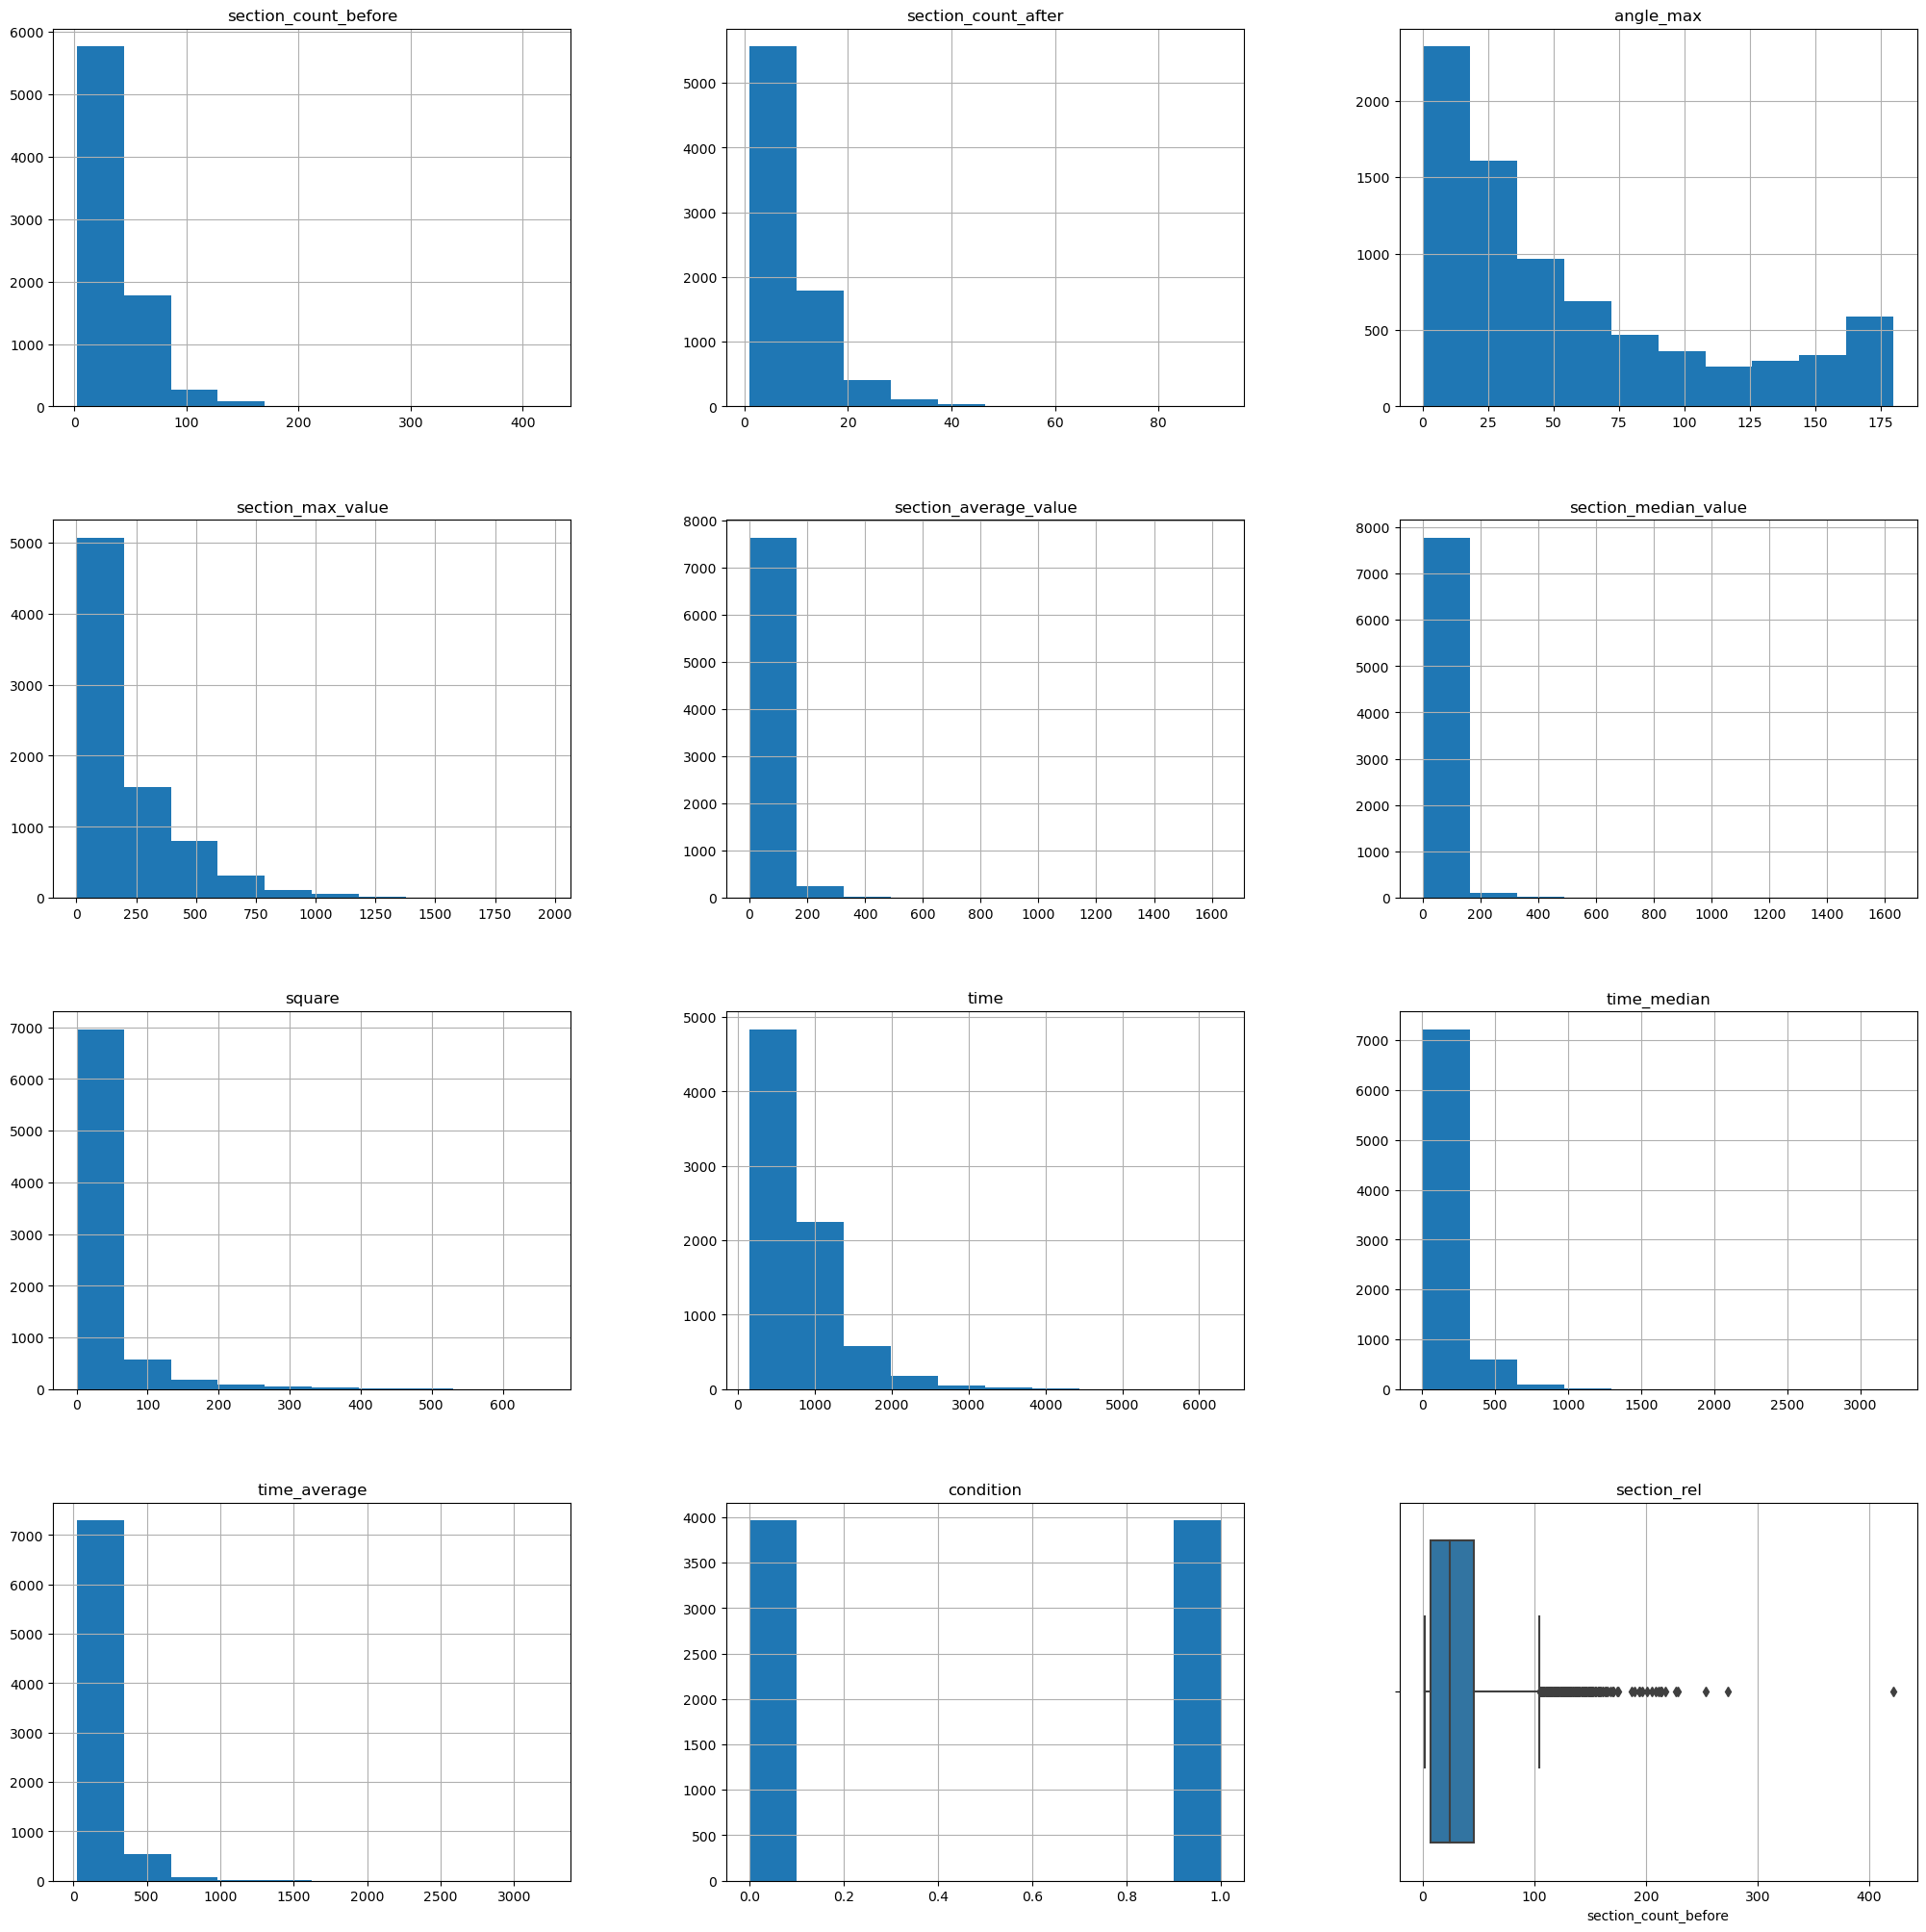

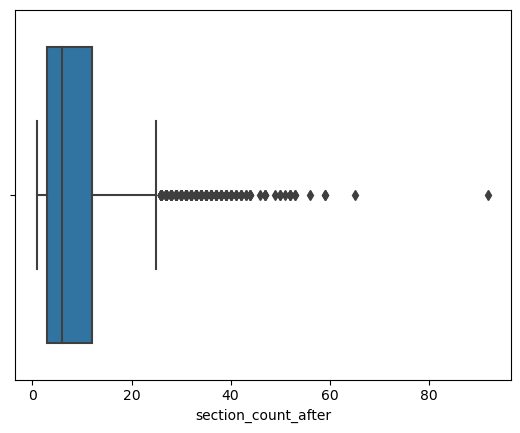

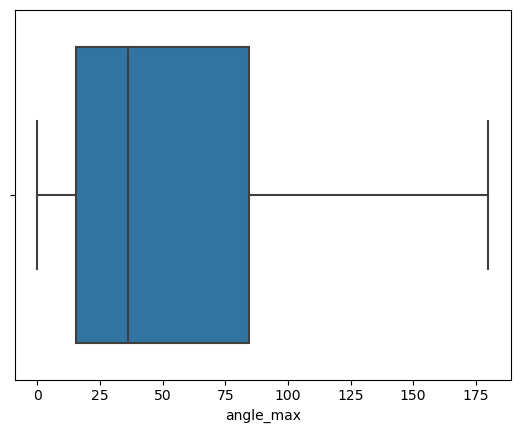

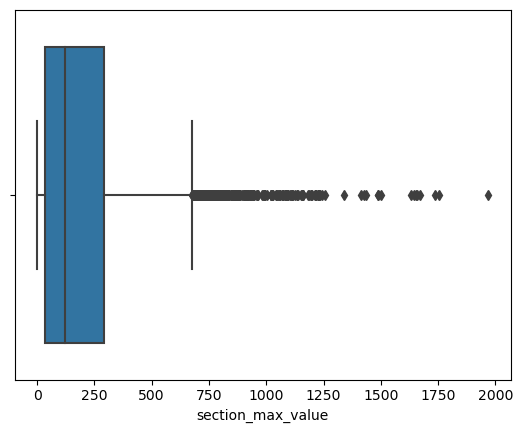

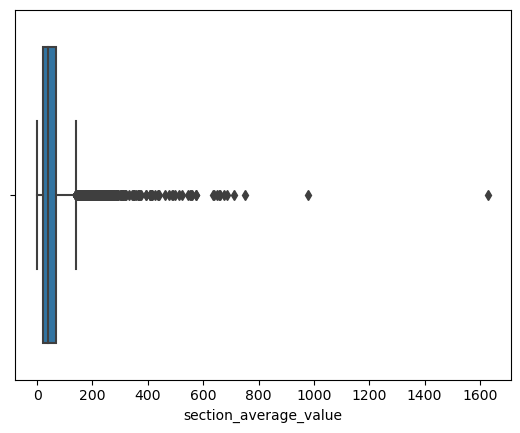

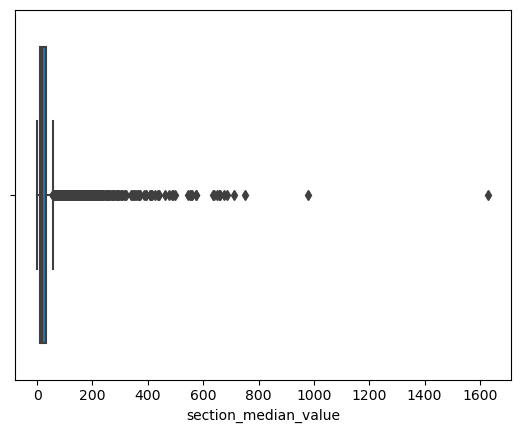

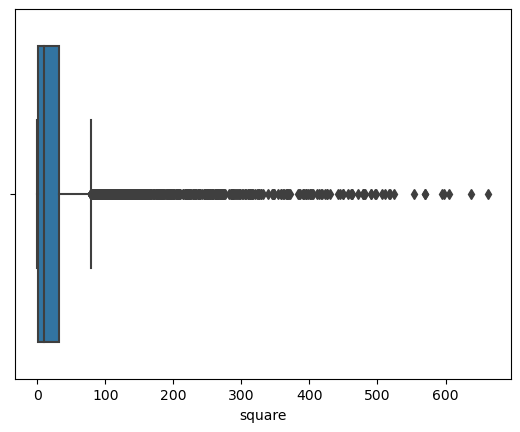

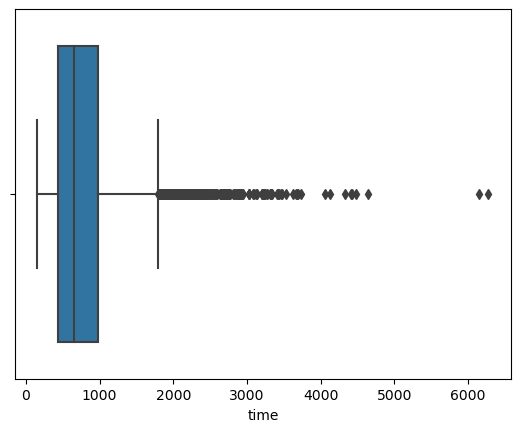

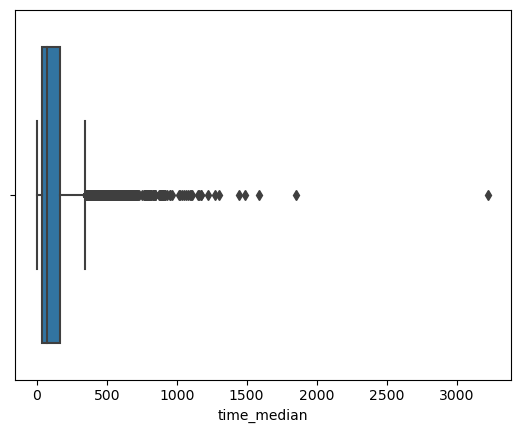

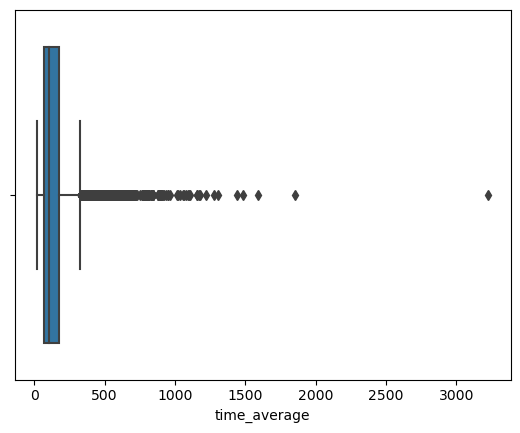

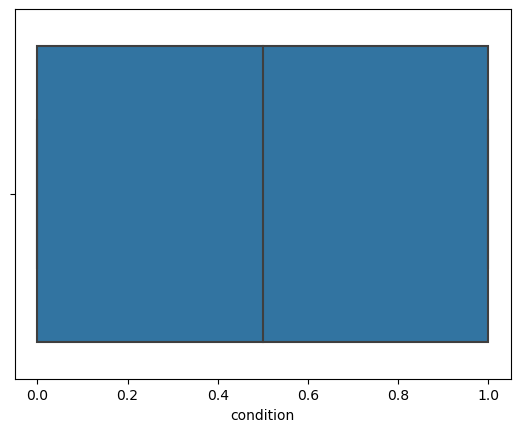

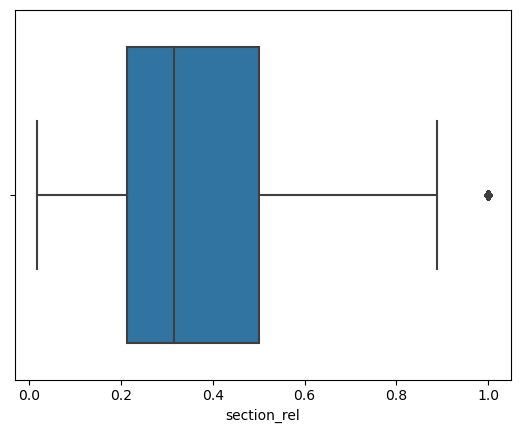

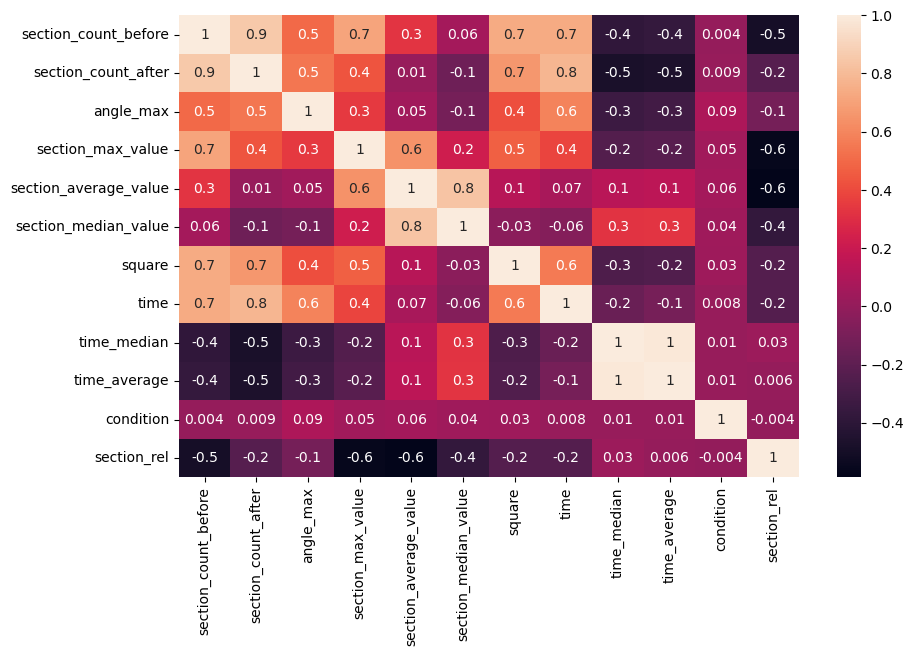

In [31]:
print_hist_boxplot_heatmap(all_data)

In [32]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(4952, 12)

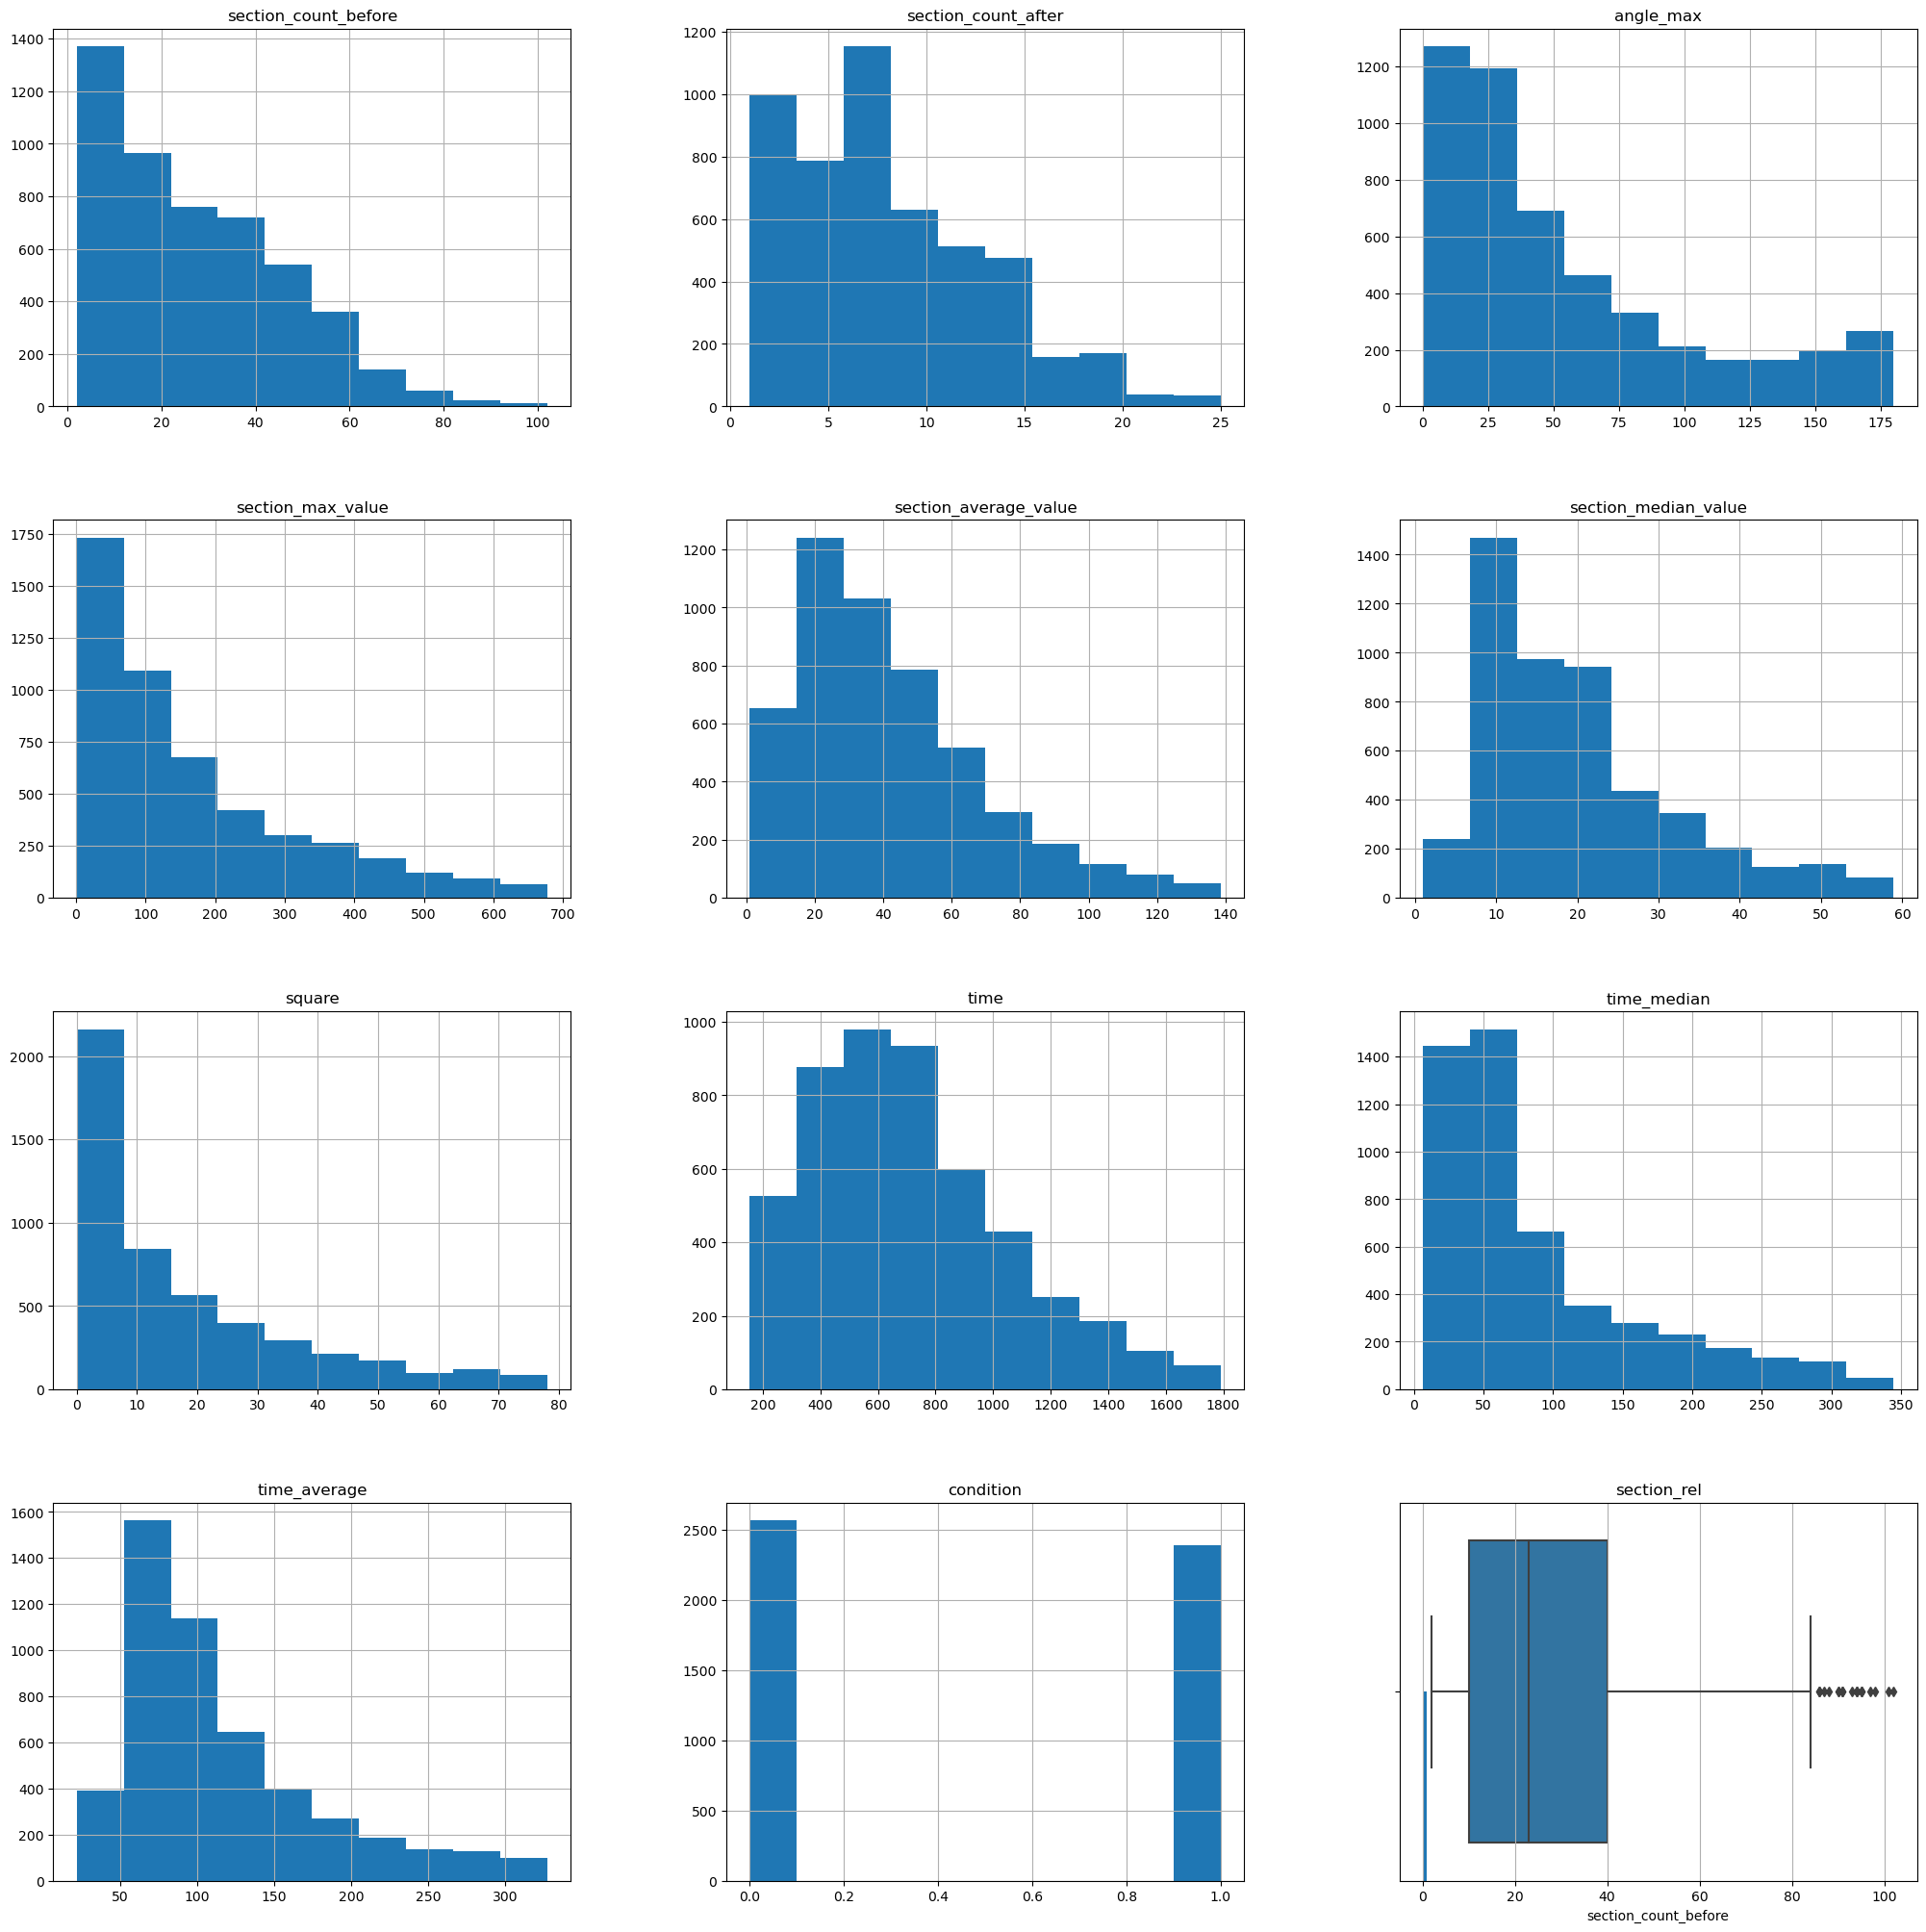

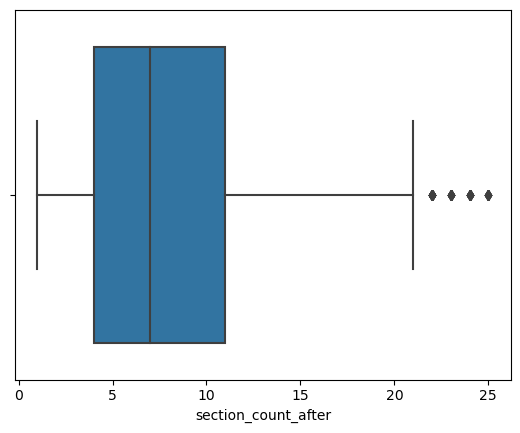

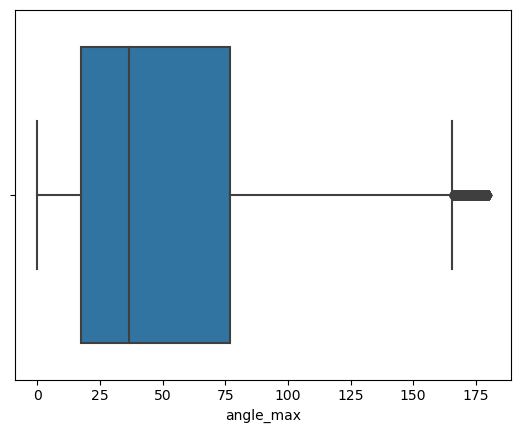

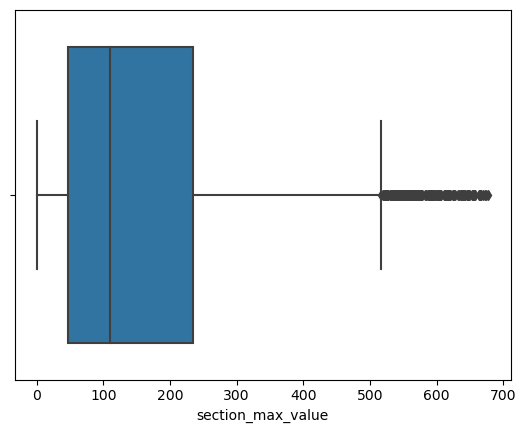

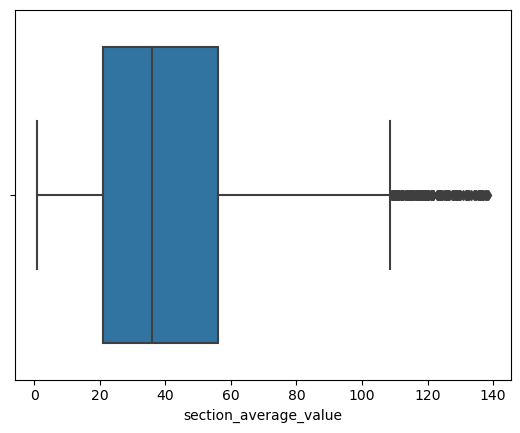

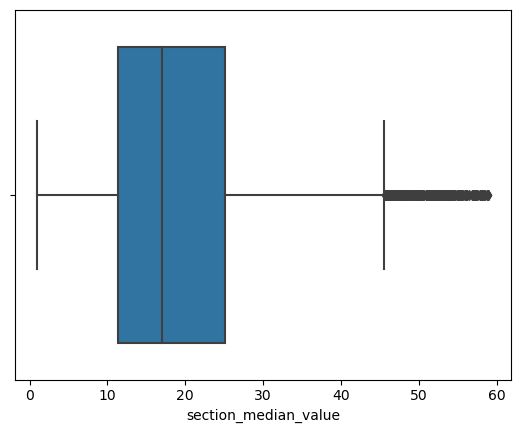

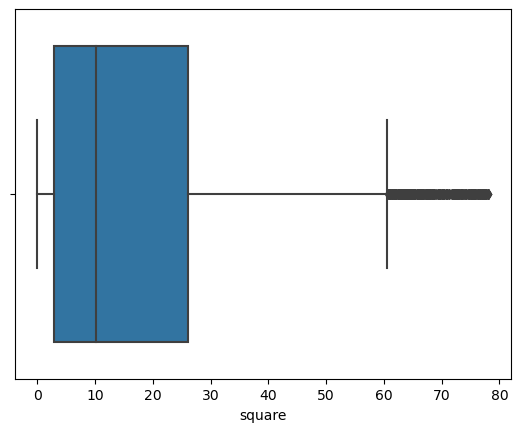

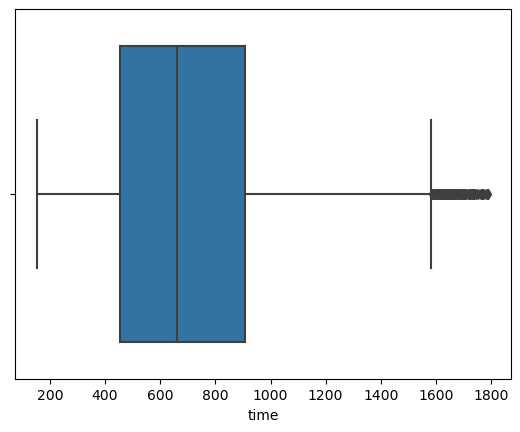

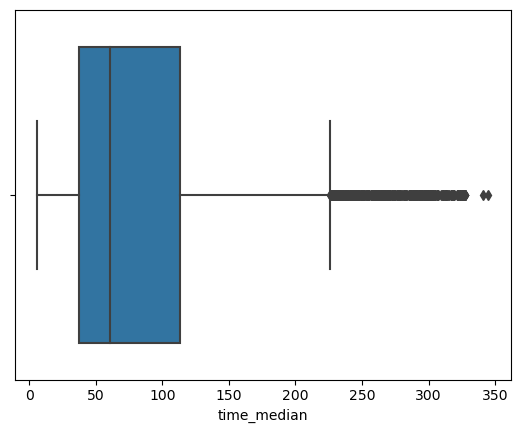

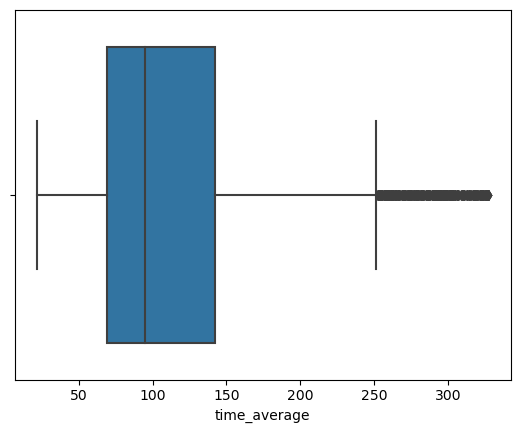

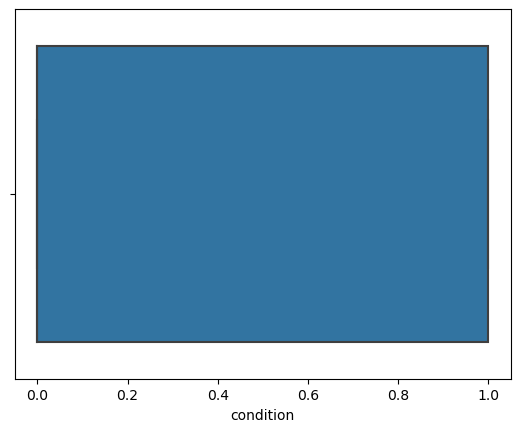

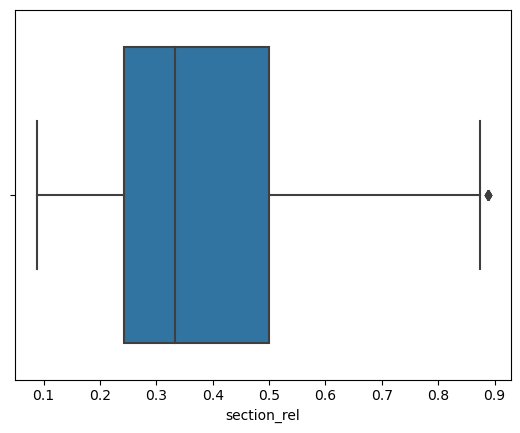

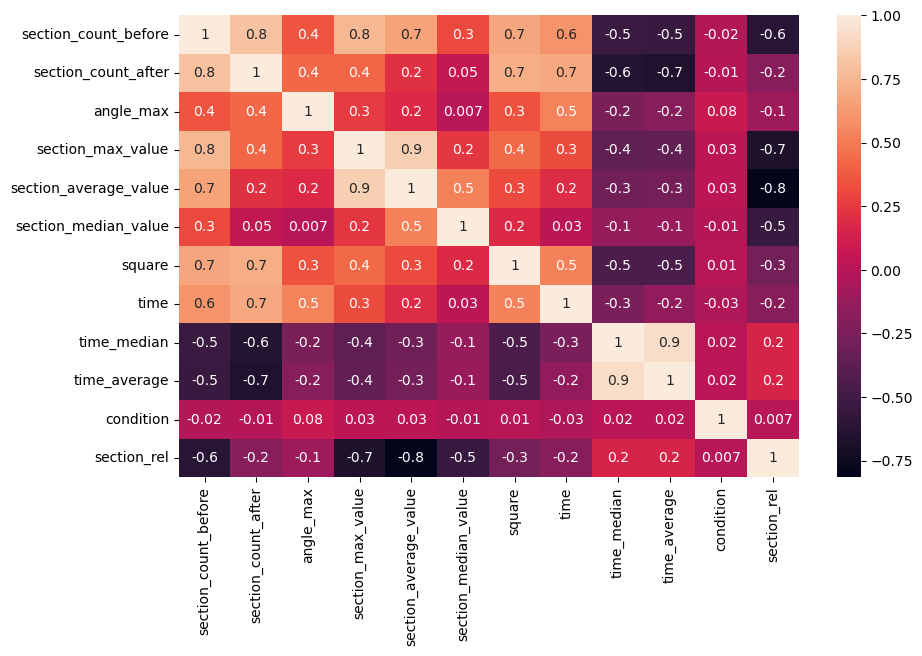

In [33]:
print_hist_boxplot_heatmap(all_data)

In [34]:
from sklearn.preprocessing import StandardScaler
scale_data = all_data.drop("condition", axis=1)
scaled_features = StandardScaler().fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data["condition"]], axis=1)

In [339]:
#all_data = all_data.drop(['time', 'time_average', 'section_average_value', 'section_max_value'], axis=1)

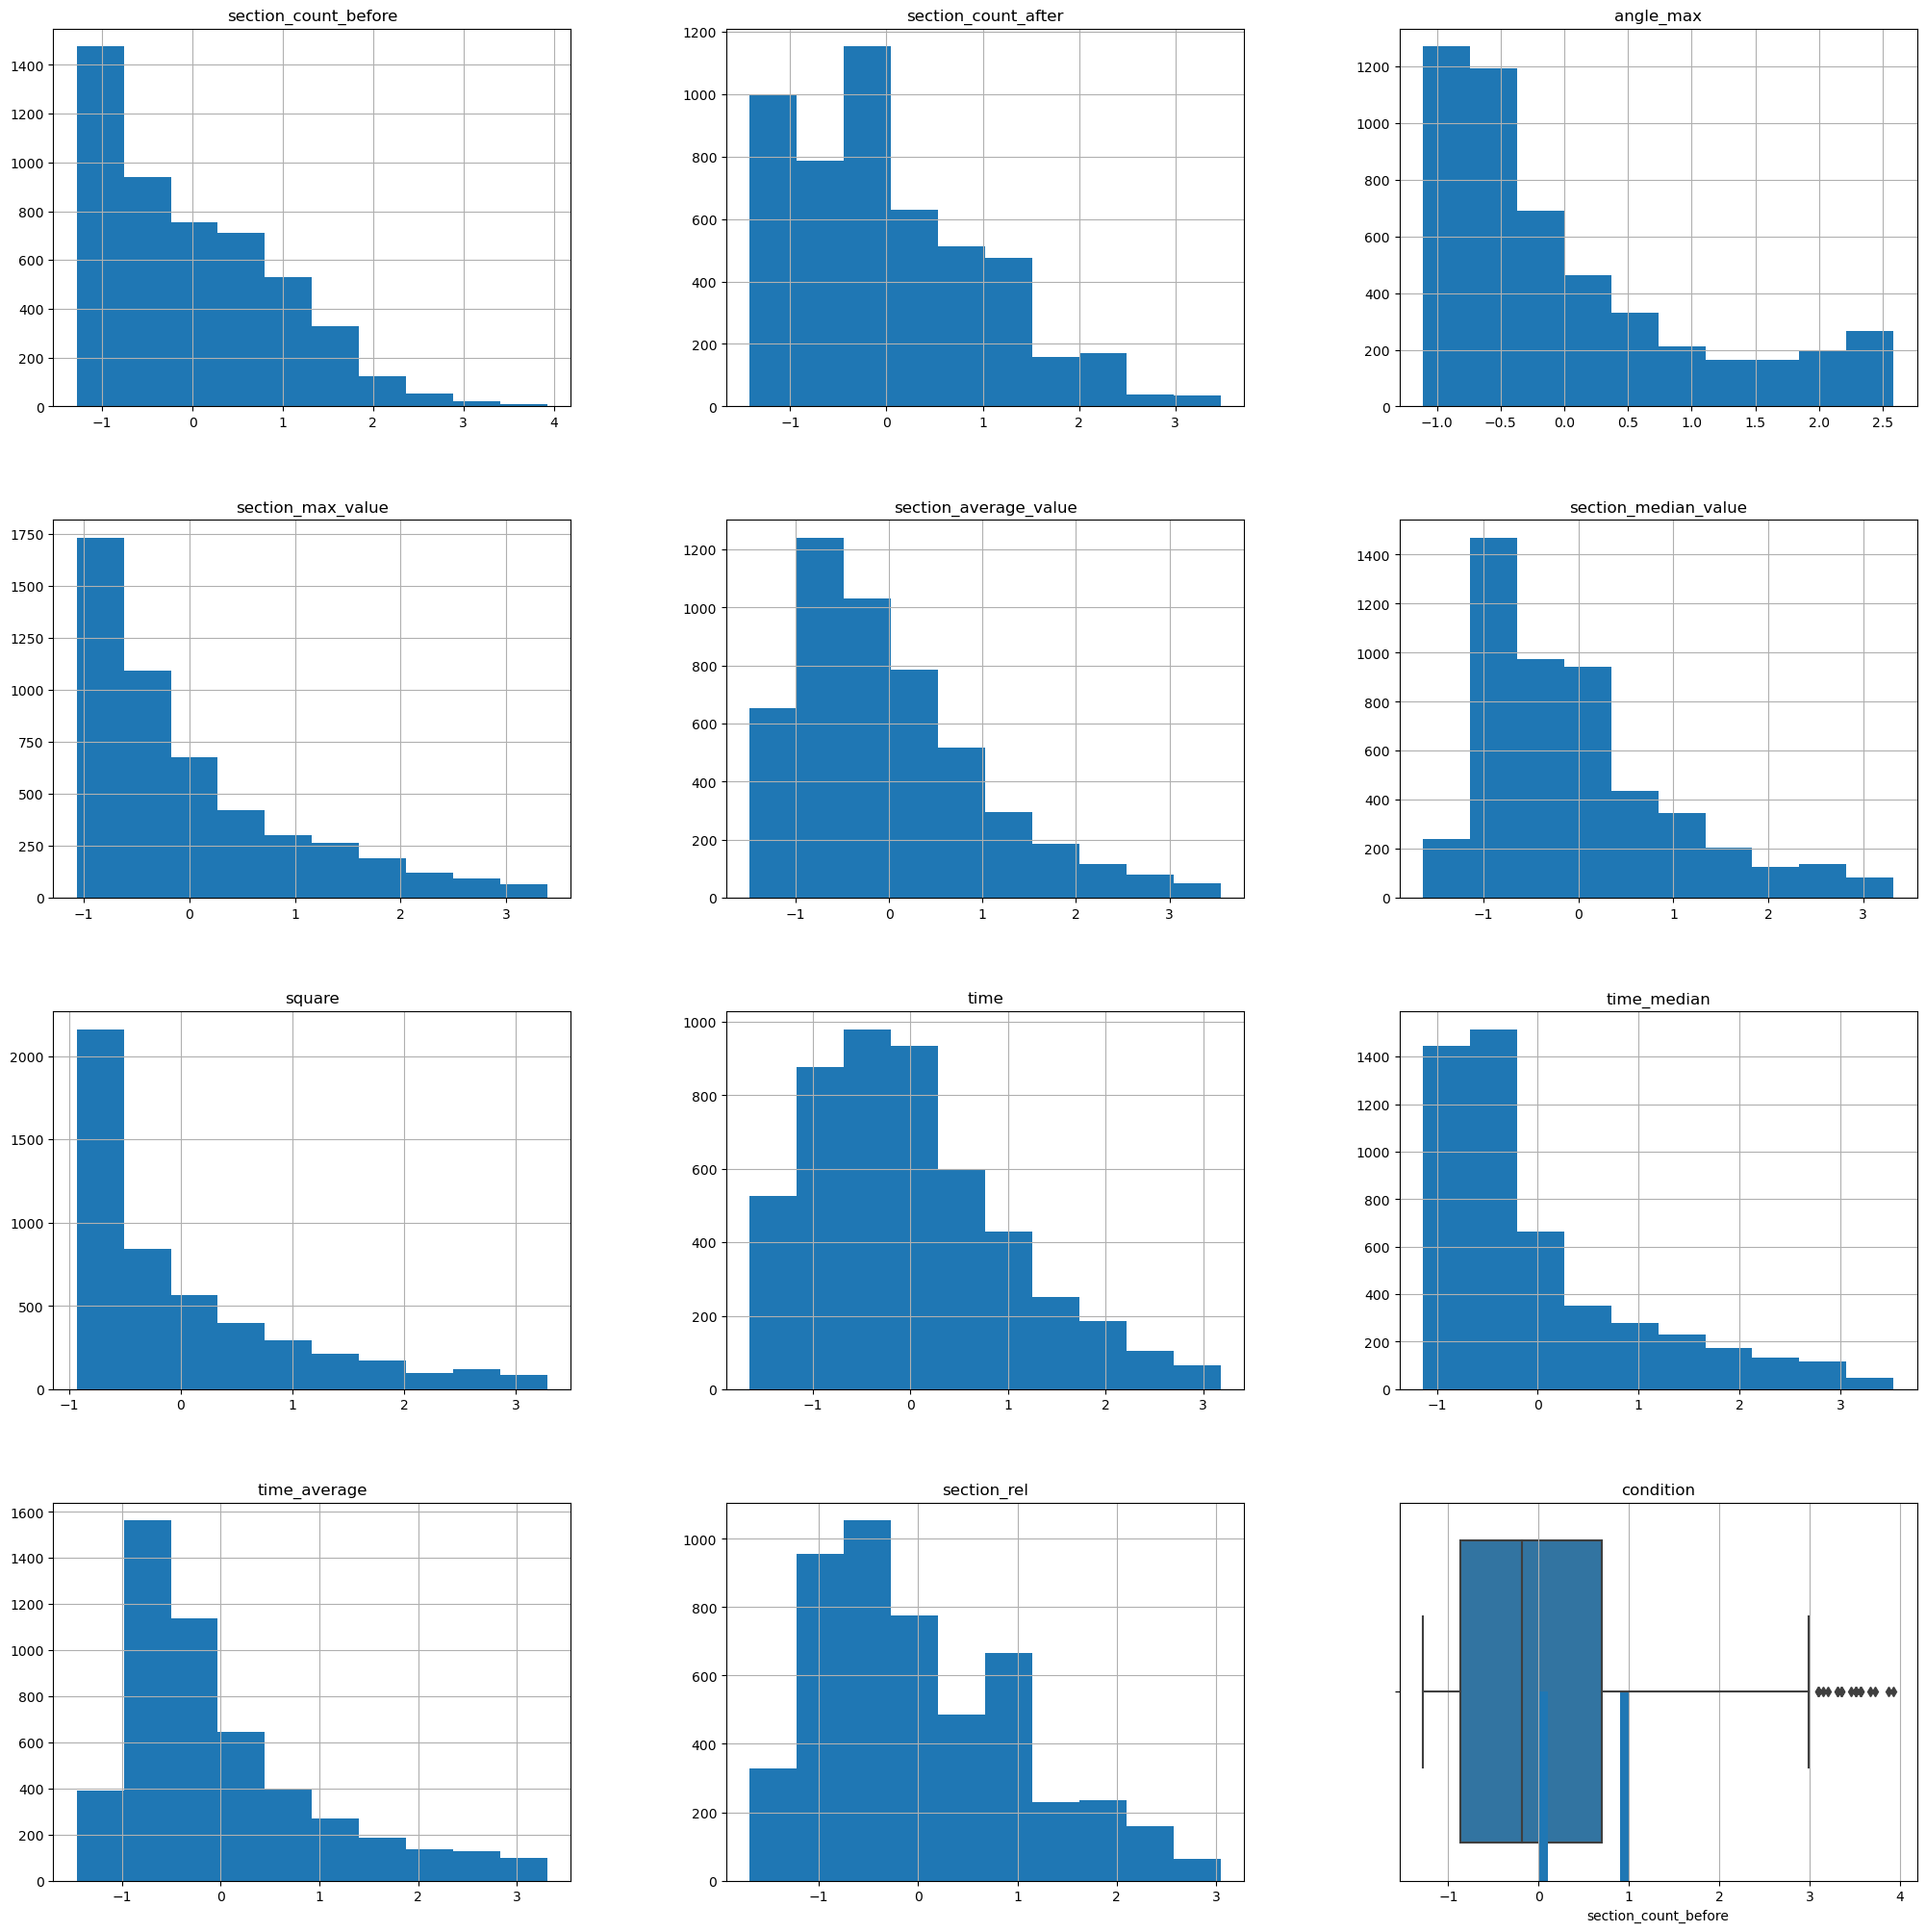

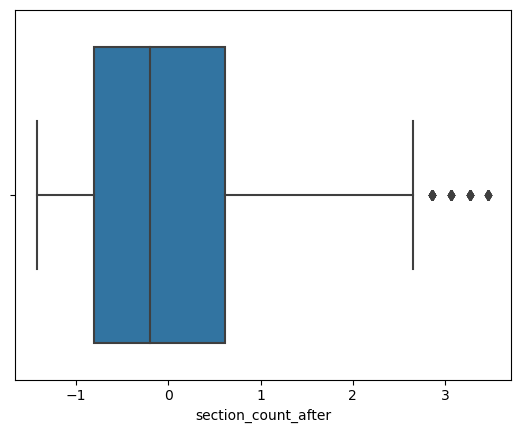

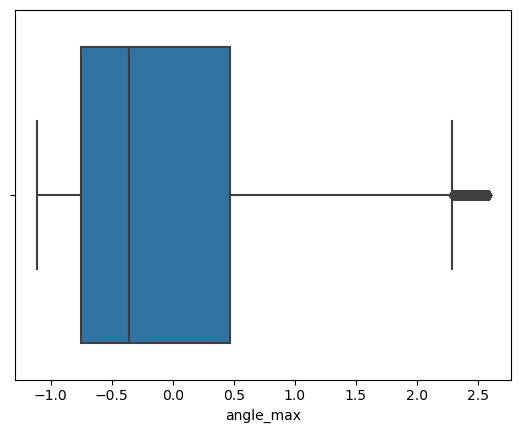

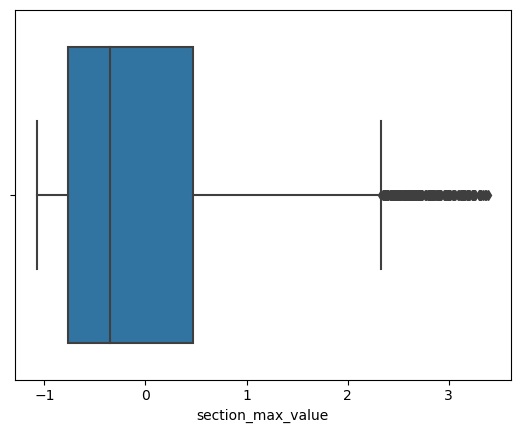

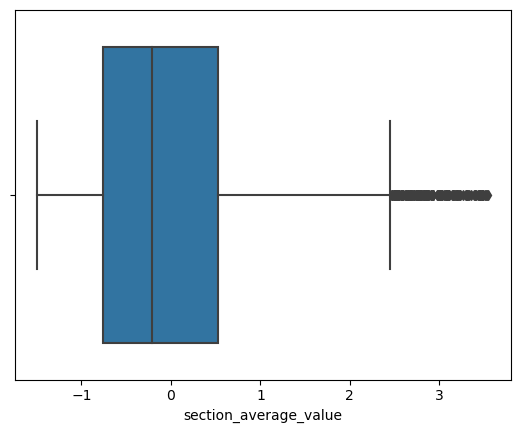

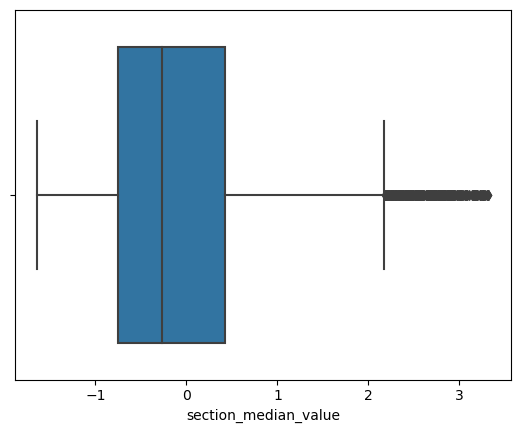

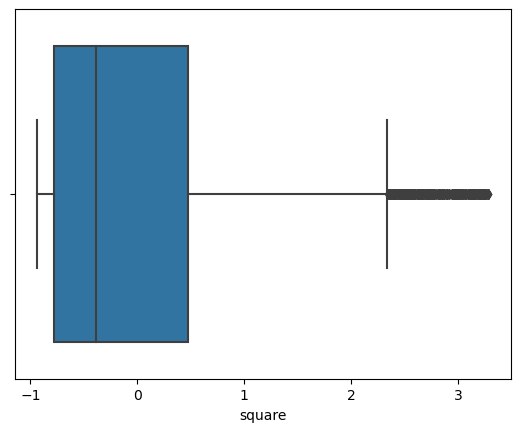

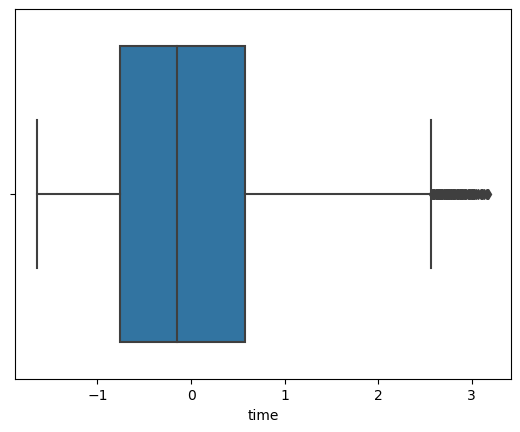

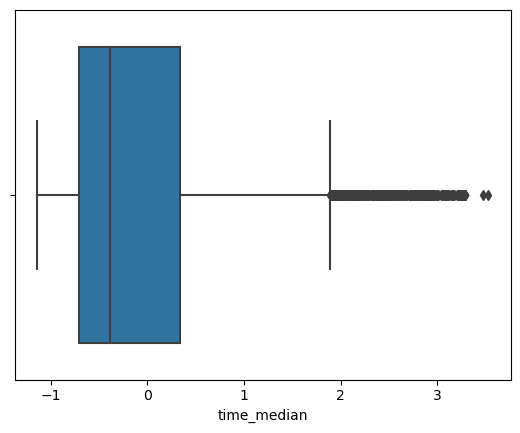

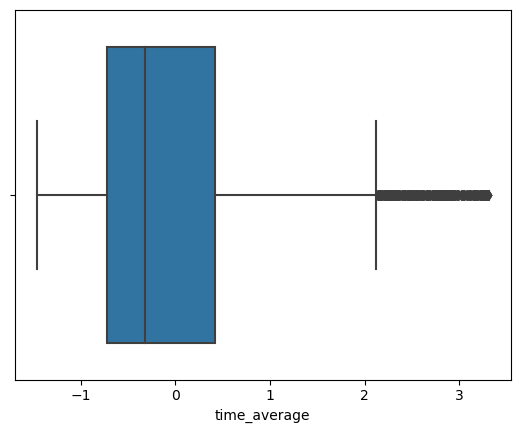

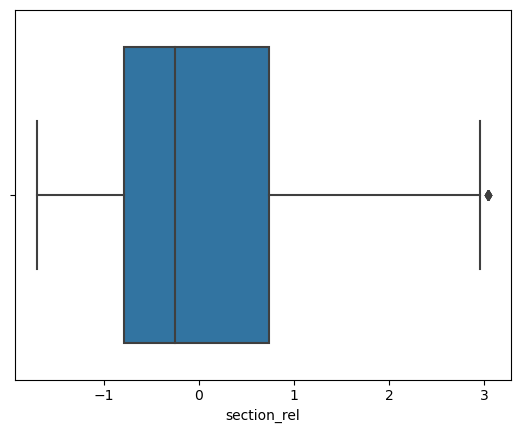

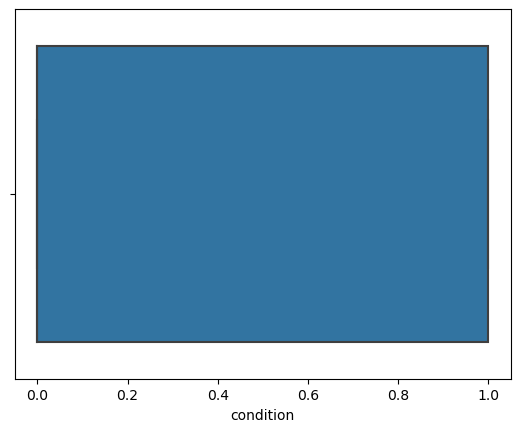

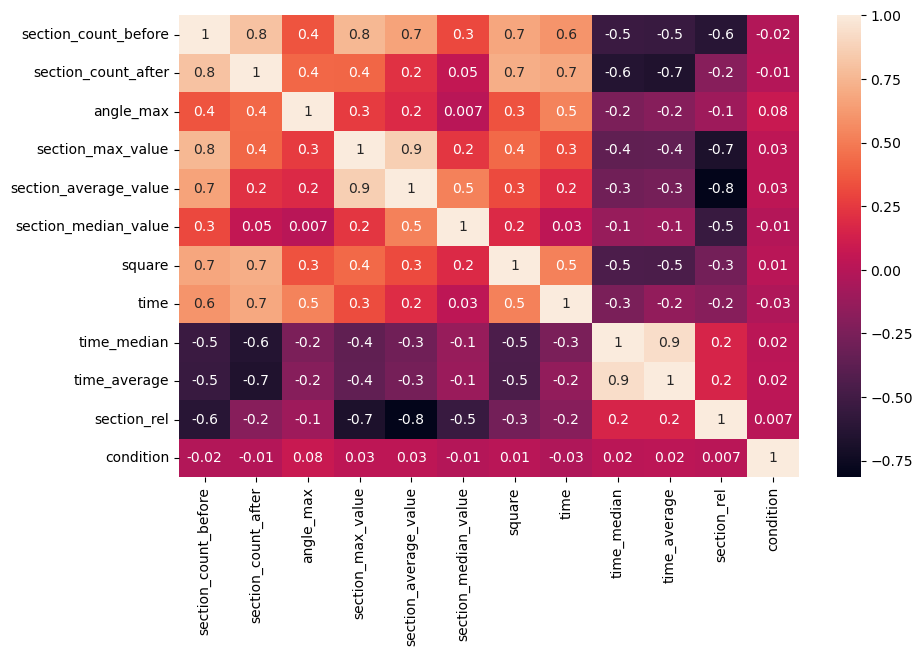

In [35]:
print_hist_boxplot_heatmap(all_data)

In [36]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.47314033 0.1894621 ]


Обучение

In [37]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [38]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X_train

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,section_rel
6471,-0.760929,-0.604406,-0.796575,-0.849510,-0.538628,1.039180,-0.671010,-0.967141,-0.400007,-0.604222,0.245847
3030,-0.500455,-0.604406,-0.438965,-0.293523,0.195979,-0.747290,-0.263149,-0.572194,-0.349157,-0.185830,-0.480511
7973,1.322862,1.024227,-0.352991,0.467520,0.538702,0.190421,0.880626,1.208053,-0.786442,-0.454346,-0.742000
2658,-1.021403,-1.011565,-0.795528,-0.662232,-0.520125,-0.829558,-0.906290,-1.315952,-0.893983,-0.422318,0.316408
2233,0.854009,1.227806,2.339420,1.235793,1.281251,-0.753349,1.267725,0.699307,-0.530086,-0.743008,-0.294022
...,...,...,...,...,...,...,...,...,...,...,...
4156,-1.125592,-1.011565,0.394654,-0.915563,-0.969971,-0.781667,-0.725297,-0.653174,0.750893,0.747886,1.332479
2688,-1.125592,-1.011565,-0.846872,-0.926282,-0.897226,-0.094889,-0.881431,-1.303647,-0.390457,-0.400592,1.332479
3433,0.958199,1.634964,-0.878586,0.160026,-0.168993,-0.269781,0.579244,-0.533290,-1.114711,-1.283293,-0.116363
3519,0.333061,0.209910,0.498270,0.075380,0.491493,1.286550,0.430475,-1.136055,-0.897506,-1.235479,-0.607293


In [40]:
y_train

6471    0
3030    1
7973    0
2658    1
2233    1
       ..
4156    1
2688    0
3433    1
3519    1
197     0
Name: condition, Length: 3961, dtype: int64

Градиентый бустинг

In [41]:
from xgboost import XGBClassifier

In [42]:
grid_param = {'learning_rate': [0.001, 0.01, 0.1], 
        'min_child_weight': [1, 5],
        'max_depth': [1, 2, 5, 10, 20],
        'n_estimators': [10, 50, 100, 500, 1000]
        }

In [43]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5, 10, 20],
                         'min_child_weight': [1, 5],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [44]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 1,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
y_pred = best_clf.predict(X_test)

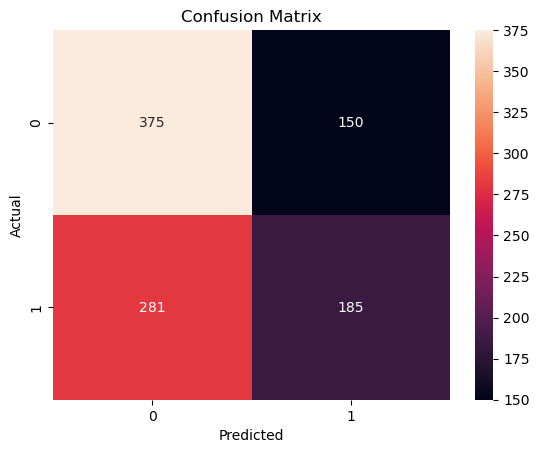

In [46]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [47]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.71      0.64       525
     class 1       0.55      0.40      0.46       466

    accuracy                           0.57       991
   macro avg       0.56      0.56      0.55       991
weighted avg       0.56      0.57      0.55       991



Случайный лес

In [48]:
grid_param = {
    'n_estimators': [50, 100, 150, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 2)
}

In [49]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 2),
                         'n_estimators': [50, 100, 150, 200, 400]})

In [50]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
y_pred = best_clf.predict(X_test)

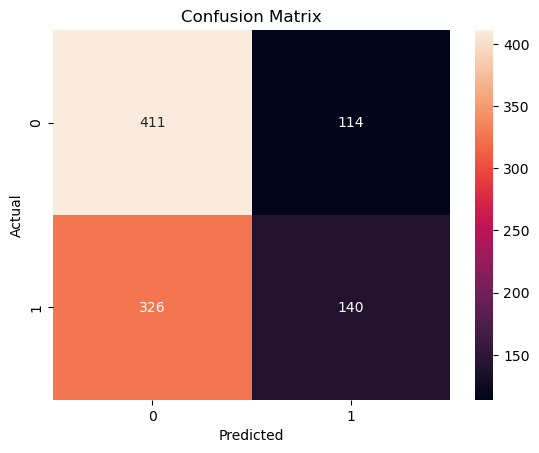

In [52]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [53]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.56      0.78      0.65       525
     class 1       0.55      0.30      0.39       466

    accuracy                           0.56       991
   macro avg       0.55      0.54      0.52       991
weighted avg       0.55      0.56      0.53       991



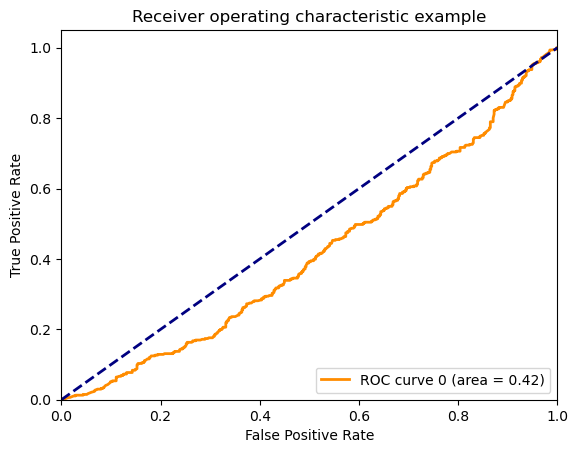

In [54]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

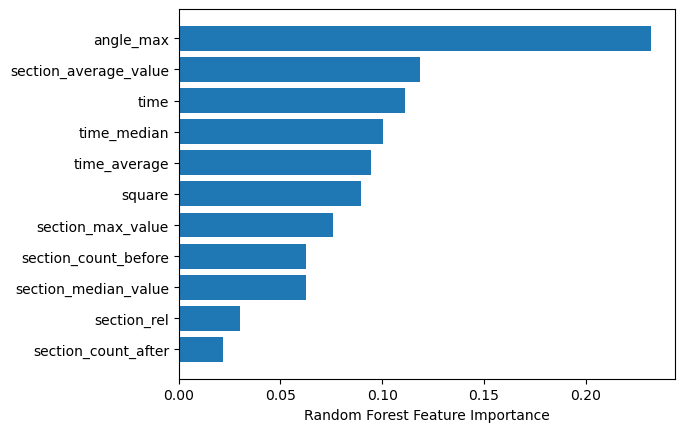

In [55]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [56]:
np.sum(best_clf.feature_importances_)

1.0000000000000002

KNN

In [57]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [58]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [59]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'distance'}

In [60]:
y_pred = best_clf.predict(X_test)

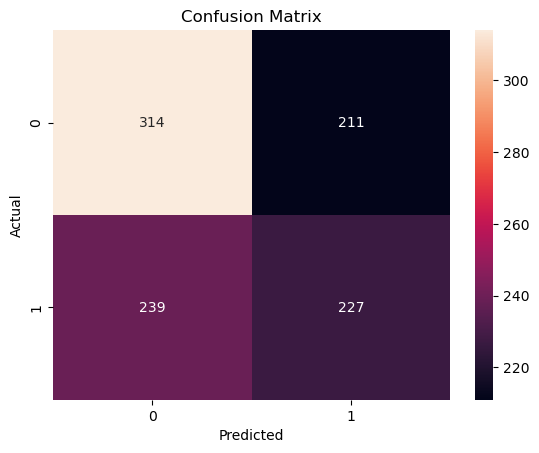

In [61]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [62]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.60      0.58       525
     class 1       0.52      0.49      0.50       466

    accuracy                           0.55       991
   macro avg       0.54      0.54      0.54       991
weighted avg       0.54      0.55      0.54       991



SVM

In [63]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [64]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [65]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [66]:
y_pred = best_clf.predict(X_test)

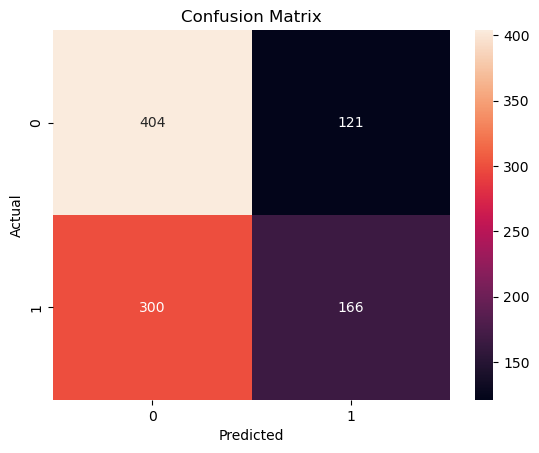

In [67]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [68]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.77      0.66       525
     class 1       0.58      0.36      0.44       466

    accuracy                           0.58       991
   macro avg       0.58      0.56      0.55       991
weighted avg       0.58      0.58      0.56       991

